In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Import data
df = pd.read_csv('medical_examination.csv')

#Add 'overweight' column
df['overweight'] = (df["weight"] / ((df["height"] / 100) **2)).apply(lambda x: 1 if x >25 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [16]:
#Normalize data by making 0 good and 1 bad
#If the value of 'cholesterol' or 'gluc' is 1, make value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


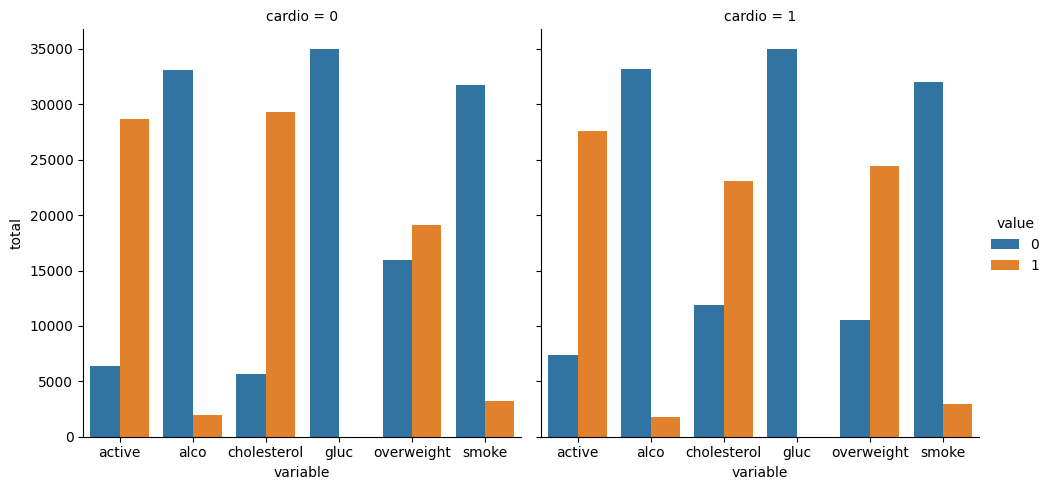

In [31]:
# Create DataFrame for cat plot using `pd.melt` 
#using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

#group and reformat the data to split it by 'cardio'.
#show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.melt(df, id_vars='cardio', value_vars = df_cat)

#Draw the catplot with 'sns.catplot'
sns.catplot(x='variable', col='cardio', hue='value', kind='count', data=df_cat).set_axis_labels('variable', 'total')

In [38]:
#Draw Heat Map
#Clean the data
df_heat = df.loc[(df['ap_lo'] <=df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975))]

In [39]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [40]:
#generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot: >

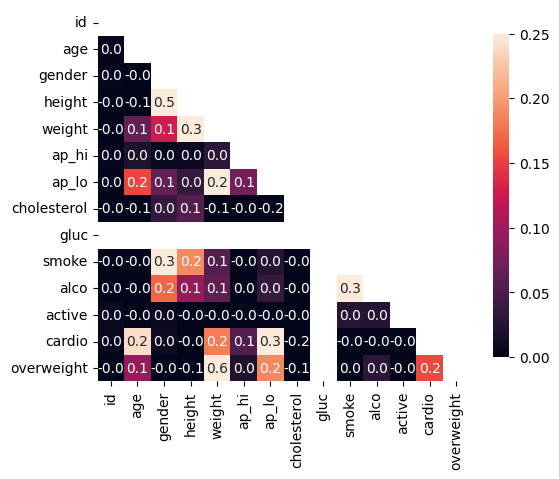

In [51]:
#Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, vmin=0, vmax=0.25, annot=True, fmt='.1f', linewidths=0,  square=True, mask=mask, cbar_kws={'shrink':.70})